In [7]:


#with open('promptfoo_data/processed/generationResults/output_gR_20240630_113545.json', encoding='utf-8-sig') as f_input: #output_generation_results.json
#    df = pd.json_normalize(json.load(f_input))



In [1]:
import pandas as pd
import json

CARBON_INTENSITY_GERMANY = 0.313
POWER_PER_GB_MEM = 0.12 # roughly ratio in DDR6
JOUL_TO_KWH = 2.78e-7
RTX_TITAN_TDP = 600

# in MB
model_sizes = {
    "Meta-Llama-3-8B-Instruct.Q8_0": 8542,
    "capybarahermes-2.5-mistral-7b.Q8_0": 7696,
    "discolm_german_7b_v1.Q8_0": 7696,
    "mistral-7b-instruct-v0.2.Q4_K_M": 4369,
    "mistral-rag-instruct.Q4_K_M": 4369,
    "mistral-rag-instruct.Q8_0": 7696,
}

# carbon footprint in kgCO2e (for one inference)
def calculate_carbon_footprint(inference_time: float, model: str):
    m = model_sizes[model]
    tdp = RTX_TITAN_TDP
    c = CARBON_INTENSITY_GERMANY
    t = inference_time
    carbon = (tdp + m * 0.001 * POWER_PER_GB_MEM) * t * 0.001 * JOUL_TO_KWH * c
    return carbon


#print(calculate_carbon_footprint(9469.66, "test"))

In [2]:
import json
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

pd.set_option('display.max_columns', None)

output_file = "output_gR_20240630_220713.json"

with open(f'promptfoo_data/processed/generationResults/{output_file}', encoding='utf-8-sig') as f_input:
    df = pd.json_normalize(json.load(f_input))

llm_column = 'model'

df = df.sort_values(by='model')


df['carbon_footprint'] = df.apply(lambda row: calculate_carbon_footprint(row['timings.total_time.time'], row[llm_column]), axis=1)

# Unique Models
unique_models = sorted(df['model'].unique())


non_metric_columns = ['question', 'answer', 'output', 'context', 'keywords']

# only metrci column names
metric_columns = [col for col in df.columns if col != llm_column and col not in non_metric_columns]
numeric_metric_columns = [col for col in metric_columns if col != 'finish_reason']

important_metric_columns = ['perplexity', 'timings.load_time.time', 'timings.prompt_eval_time.time', 'timings.eval_time.time', 'timings.eval_time.tokens_per_second', 'timings.total_time.time', 'token_usage.prompt_tokens', 'token_usage.completion_tokens', 'carbon_footprint']


df


model  \
133  Meta-Llama-3-8B-Instruct.Q8_0   
37   Meta-Llama-3-8B-Instruct.Q8_0   
187  Meta-Llama-3-8B-Instruct.Q8_0   
181  Meta-Llama-3-8B-Instruct.Q8_0   
43   Meta-Llama-3-8B-Instruct.Q8_0   
..                             ...   
149      mistral-rag-instruct.Q8_0   
143      mistral-rag-instruct.Q8_0   
137      mistral-rag-instruct.Q8_0   
263      mistral-rag-instruct.Q8_0   
311      mistral-rag-instruct.Q8_0   

                                                output  \
133   2\n2\n3\n1\n2\n2\n2\n2\n2\n3\n 5\n2\n2er\nEr\...   
37    1- und 9 3 4 Er: 42\nEr  2\n 4\n\nErer\n   (b...   
187   K K K  K K K K K K K auf K und K K K K K K K ...   
181  3 We nach K nach K we We ins We nacher Ern Aus...   
43    1. 2 1. 1. 1\n\n\n\n\n7-5 3 9. 4-6 in 1st 1. ...   
..                                                 ...   
149   \n\nAnswer: If you miss the deadline for acce...   
143   Antwort: Wenn die Frist zur Annahme des Studi...   
137   Answer: The process of selecting a candidate ...   
263   Sie haben eine Frage zu einem bestimmten Them...   
311   Answer: Die Auswahlgespräche sind wichtig, um...   

                                                answer  \
133  Nach Abschluss des Auswahlverfahrens werden Zu...   
37   Sprachnachweise für den gewählten Studiengang,...   
187  Wenn die Zahl der geeigneten Bewerbungen die G...   
181  Wenn die Zahl der geeigneten Bewerbungen die G...   
43   Sprachnachweise für den gewählten Studiengang,...   
..                                                 ...   
149  Wenn die Frist zur Annahme des Studienplatzes ...   
143  Wenn die Frist zur Annahme des Studienplatzes ...   
137  Nach Abschluss des Auswahlverfahrens werden Zu...   
263  Im Auswahlgespräch wird die Eignung für den ge...   
311  Die nach dem Ergebnis der Vorauswahlkriterien ...   

                                              keywords  perplexity  \
133  [Zulassungs- und Ablehnungsbescheide, postalis...    3.944336   
37   [Bewerbungsschluss, Antrag auf Zulassung, § 6 ...    7.448581   
187  [geeigneten Bewerbungen, Gesamtzahl der zur Ve...    8.642190   
181  [geeigneten Bewerbungen, Gesamtzahl der zur Ve...    2.543180   
43   [Bewerbungsschluss, Antrag auf Zulassung, § 6 ...    6.084044   
..                                                 ...         ...   
149  [keine Nachfrist, erlischt die Zulassung, Imma...    1.192896   
143  [keine Nachfrist, erlischt die Zulassung, Imma...    1.180623   
137  [Zulassungs- und Ablehnungsbescheide, postalis...    1.151680   
263  [Eignung für den gewählten Studiengang, Motiva...    1.475933   
311  [Vorauswahlkriterien, 15-minütigen Auswahlgesp...    1.297357   

    finish_reason                                            context  \
133        length  [{"page_content": "\u00a7 7 Auswahlverfahren\n...   
37         length  [{"page_content": "\n\n(1) 1Vom Vergabeverfahr...   
187        length  [{"page_content": "\n\u00a7 9a Auswahlgespr\u0...   
181        length  [{"page_content": "\n\nEine einschl\u00e4gige ...   
43         length  [{"page_content": "\n\u00a7 4 Sprachkenntnisse...   
..            ...                                                ...   
149        length  [{"page_content": "\n\u00a7 37 HZVO, die nicht...   
143          stop  [{"page_content": "\n\u00a7 37 HZVO, die nicht...   
137        length  [{"page_content": "\u00a7 7 Auswahlverfahren\n...   
263        length  [{"page_content": "\n\u00a7 9a Auswahlgespr\u0...   
311        length  [{"page_content": "\u00a7 7 Auswahlverfahren\n...   

                                              question  latency_ms  \
133       Was kommt nach dem Bewerbungsauswahlprozess?       80237   
37   Bis zu welchem Zeitpunkt können Sprachnachweis...       84697   
187     Was ist, wenn's mehr Bewerber als Plätze gibt?       83408   
181  Was passiert, wenn es mehr Bewerbungen als Stu...       77720   
43   Wann kann man seine Deutschprüfung nachreichen...       87209   
..                                                 .

In [ ]:
df[llm_column].unique()

In [13]:
df.to_csv('output3.csv', sep=';')

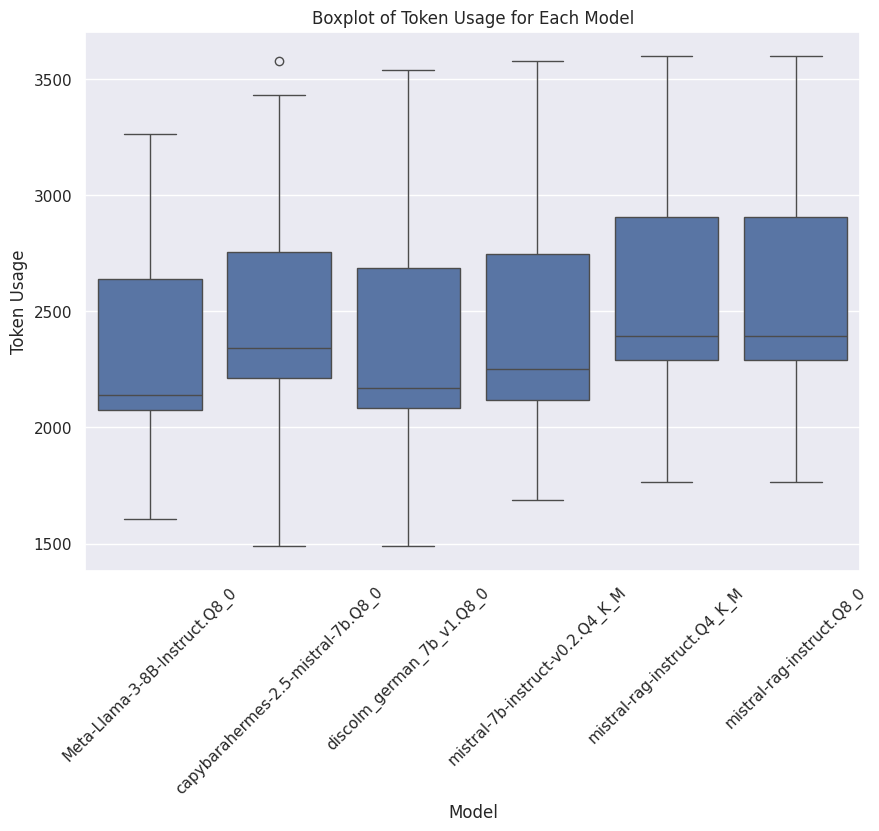

In [14]:
plt.figure(figsize=(10, 7))  # Set the figure size
sns.boxplot(x=llm_column, y='token_usage.total_tokens', data=df)  # Create a boxplot

# Optional: Enhancements for better visualization
plt.title('Boxplot of Token Usage for Each Model')
plt.xlabel('Model')
plt.ylabel('Token Usage')
plt.xticks(rotation=45)  # Rotate model names for better readability if necessary

plt.show()

UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

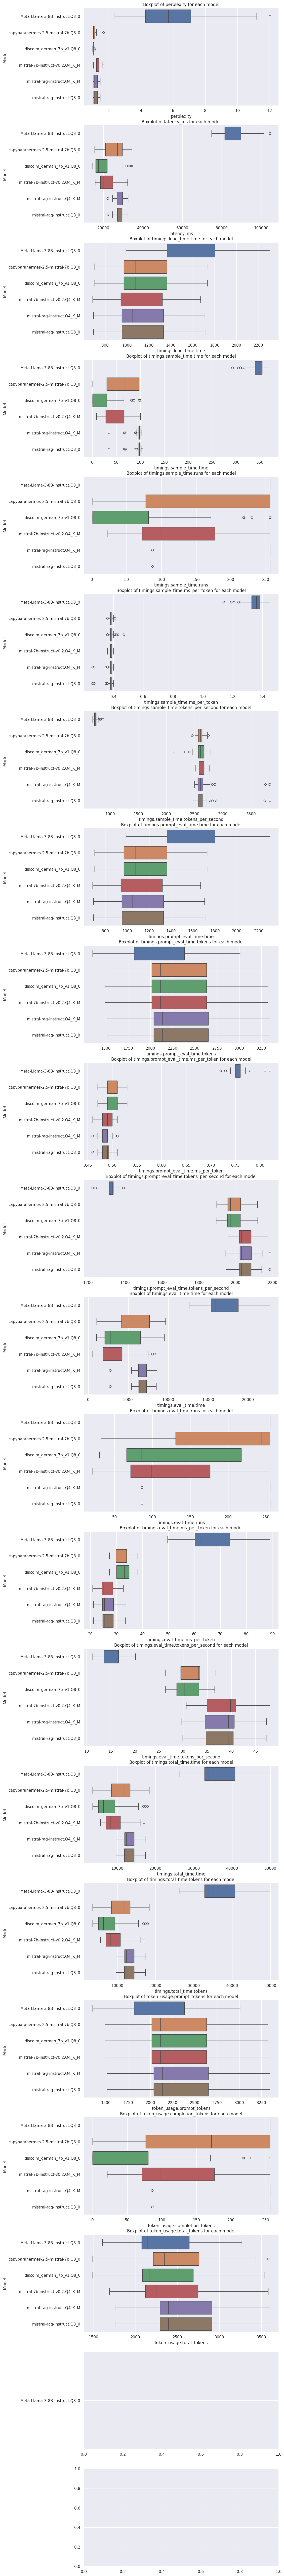

In [15]:
fig, axes = plt.subplots(nrows=len(numeric_metric_columns), figsize=(10, 6 * len(numeric_metric_columns)))  # Adjust size as necessary

palette = sns.color_palette("hsv", len(numeric_metric_columns))

# Create a boxplot for each metric
for ax, metric, color in zip(axes, numeric_metric_columns, palette):
    sns.boxplot(x=metric, y=llm_column, data=df, ax=ax, hue=llm_column)
    ax.set_title(f'Boxplot of {metric} for each model')
    ax.set_ylabel('Model')
    ax.set_xlabel(metric)
    #ax.tick_params(axis='x', rotation=45) 



#import matplotlib.patches as mpatches
#patches = [mpatches.Patch(color=color, label=metric) for metric, color in zip(numeric_metric_columns, palette)]


#fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=len(numeric_metric_columns), frameon=False)

plt.subplots_adjust(hspace=100)
plt.xlim(-0.02, 1.02)

plt.tight_layout()
plt.show()

In [18]:
df[llm_column].unique()

array(['Meta-Llama-3-8B-Instruct.Q8_0',
       'capybarahermes-2.5-mistral-7b.Q8_0', 'discolm_german_7b_v1.Q8_0',
       'mistral-7b-instruct-v0.2.Q4_K_M', 'mistral-rag-instruct.Q4_K_M',
       'mistral-rag-instruct.Q8_0'], dtype=object)

In [12]:
df[df[llm_column] == 'mistral-rag-instruct.Q4_K_M'][['model','question', 'output']].loc[4]['output']

'\nAnswer: Die folgenden Dokumente können als Nachweis für deutsche Sprachkenntnisse akzeptiert werden: 1. Deutsches Leistungskürzel (DLK) mit der Note 2,0 oder besser. 2. Deutsches Sprachdiplom (DSD) I oder DSD II mit der Note 2,0 oder besser. 3. Deutsches Sprachdiplom - Staatliches Examen für das Lehramt an den Grundschulen (DSD-1) oder DSD-2) mit der Note 2,0 oder besser. 4. Deutsches Sprachdiplom - Staatliches Examen für das Lehramt an den Grundschulen (DSD-1) oder DSD-2) mit der Note 2,0 oder besser. 5. Deutsches Sprachdiplom - Staatliches Examen für das Lehramt an den Grundschulen (DSD-1) oder DSD-2) mit der Note 2,0 oder besser. 6. Deutsches Sprachdiplom - Staatliches'

In [8]:
df[df[llm_column] == 'mistral-rag-instruct.Q4_K_M'][['model','question', 'output']].loc[256]['output']

'b. 1Die Bewertung des Auswahlgesprächs erfolgt auf Grundlage der Auswahlnote.\n(3) 1Die Rangfolge bestimmt sich nach der Auswahlnote entsprechend Absatz 2; beginnend bei dem niedrigsten Wert.\n(4) 1Bei Ranggleichheit richtet sich die Reihenfolge nach der Durchschnittsnote des Hochschulabschlusses, der Voraussetzung für den Zugang zu dem Studiengang ist gemäß § 6 Abs. 4 Satz 4 Alternative 1 HZG. Im Übrigen gilt § 6 Abs. 4 Satz 4, 2. Halbsatz HZG (Losverfahren) .\nSource: \n/home/tpllmws23/Chatbot-LLama-Pruefungsamt/main_data_filtered/119_ZuSMa_Senat_18012022.pdf'

In [35]:
df[df[llm_column] == 'mistral-rag-instruct.Q4_K_M'][['model','question', 'output']]

model  \
238  mistral-rag-instruct.Q4_K_M   
52   mistral-rag-instruct.Q4_K_M   
100  mistral-rag-instruct.Q4_K_M   
160  mistral-rag-instruct.Q4_K_M   
232  mistral-rag-instruct.Q4_K_M   
10   mistral-rag-instruct.Q4_K_M   
310  mistral-rag-instruct.Q4_K_M   
280  mistral-rag-instruct.Q4_K_M   
154  mistral-rag-instruct.Q4_K_M   
136  mistral-rag-instruct.Q4_K_M   
250  mistral-rag-instruct.Q4_K_M   
148  mistral-rag-instruct.Q4_K_M   
94   mistral-rag-instruct.Q4_K_M   
4    mistral-rag-instruct.Q4_K_M   
256  mistral-rag-instruct.Q4_K_M   
268  mistral-rag-instruct.Q4_K_M   
58   mistral-rag-instruct.Q4_K_M   
82   mistral-rag-instruct.Q4_K_M   
262  mistral-rag-instruct.Q4_K_M   
88   mistral-rag-instruct.Q4_K_M   
286  mistral-rag-instruct.Q4_K_M   
244  mistral-rag-instruct.Q4_K_M   
76   mistral-rag-instruct.Q4_K_M   
166  mistral-rag-instruct.Q4_K_M   
130  mistral-rag-instruct.Q4_K_M   
190  mistral-rag-instruct.Q4_K_M   
70   mistral-rag-instruct.Q4_K_M   
184  mistral-rag-instruct.Q4_K_M   
304  mistral-rag-instruct.Q4_K_M   
34   mistral-rag-instruct.Q4_K_M   
118  mistral-rag-instruct.Q4_K_M   
196  mistral-rag-instruct.Q4_K_M   
124  mistral-rag-instruct.Q4_K_M   
40   mistral-rag-instruct.Q4_K_M   
298  mistral-rag-instruct.Q4_K_M   
202  mistral-rag-instruct.Q4_K_M   
178  mistral-rag-instruct.Q4_K_M   
16   mistral-rag-instruct.Q4_K_M   
28   mistral-rag-instruct.Q4_K_M   
142  mistral-rag-instruct.Q4_K_M   
112  mistral-rag-instruct.Q4_K_M   
226  mistral-rag-instruct.Q4_K_M   
106  mistral-rag-instruct.Q4_K_M   
292  mistral-rag-instruct.Q4_K_M   
46   mistral-rag-instruct.Q4_K_M   
274  mistral-rag-instruct.Q4_K_M   
220  mistral-rag-instruct.Q4_K_M   
208  mistral-rag-instruct.Q4_K_M   
64   mistral-rag-instruct.Q4_K_M   
214  mistral-rag-instruct.Q4_K_M   
172  mistral-rag-instruct.Q4_K_M   
22   mistral-rag-instruct.Q4_K_M   

                                              question  \
238  Was muss ich noch einreichen außer meinen Note...   
52   Bis wann muss ich den Deutschtest nachreichen,...   
100           Wie kann man sich für'n Master bewerben?   
160                Wer nimmt am Auswahlverfahren teil?   
232  Was muss ich neben meinen Noten noch für den M...   
10           Wie wird geprüft, ob jemand Deutsch kann?   
310  Warum sind Auswahlgespräche wichtig für die St...   
280  Was ist der Unterschied zwischen einem Auswahl...   
154  Was passiert, wenn ich den Studienplatz nicht ...   
136       Was kommt nach dem Bewerbungsauswahlprozess?   
250  Was sind die Vorteile eines fachspezifischen S...   
148  Was ist, wenn man die Frist für die Studienpla...   
94          Wie kann man beim Masterstudium mitmachen?   
4    Welche Dokumente können als Nachweis für deuts...   
256  Welche Kriterien werden im Auswahlgespräch bew...   
268   Was ist ein Auswahlgespräch und wie läuft es ab?   
58   Bis wann müssen die Anträge auf Zulassung für ...   
82    Welche Papiere muss ich mit dem Antrag mitgeben?   
262                 Wie sieht ein Auswahlgespräch aus?   
88   Wie erfolgt die Teilnahme am Auswahlverfahren ...   
286  Wie wird die Teilnahme am Auswahlgespräch orga...   
244  Warum sind Zusatzkriterien neben den Noten wic...   
76   Welche Unterlagen müssen dem Antrag auf Zulass...   
166             Wer darf am Auswahlprozess teilnehmen?   
130       Was passiert nachdem die Auswahl vorbei ist?   
190     Was ist, wenn's mehr Bewerber als Plätze gibt?   
70   Bis wann soll ich den Antrag fürs Sommersemest...   
184  Was passiert, wenn es mehr Bewerbungen als Stu...   
304          Was ist der Zweck eines Auswahlgesprächs?   
34   Könnt ich die Prüfung für Deutsch auch irgendw...   
118           Wer wird nicht beim Bewerben zugelassen?   
196    Wie wird die Auswahlkommission zusammengesetzt?   
124  Was passiert nach Abschluss des Auswahlverfahr...   
40   Bis zu welchem Zeitpunkt können Sprachnachweis...   
298              Wie wird das Auswahlgespräch geplant?   
202  Wer entscheidet darüber, 

In [10]:
df[df[llm_column] == 'mistral-7b-instruct-v0.2.Q4_K_M'][['model','output']]

KeyError: 4

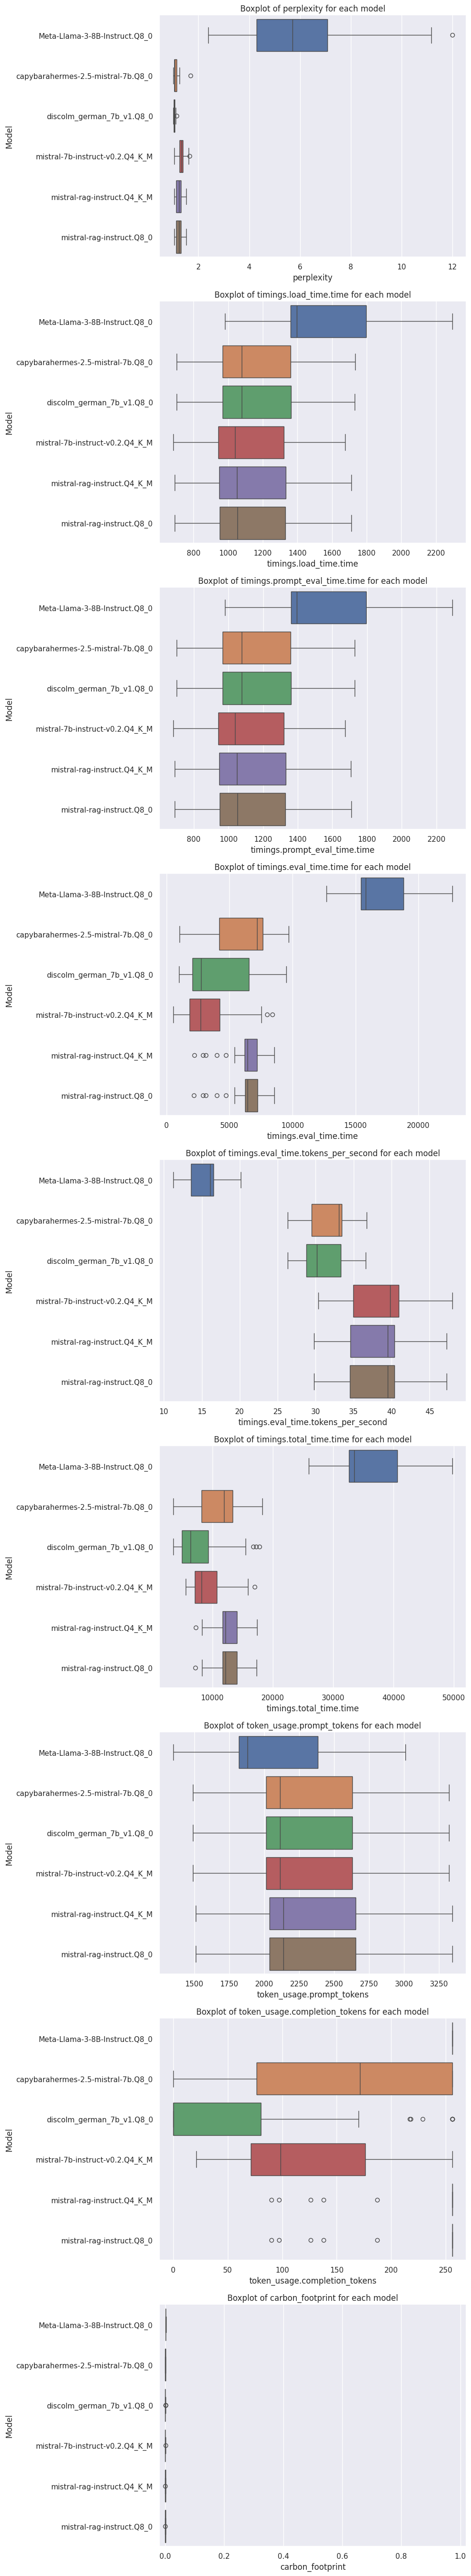

In [14]:
fig, axes = plt.subplots(nrows=len(important_metric_columns), figsize=(10, 6 * len(important_metric_columns)))  # Adjust size as necessary

palette = sns.color_palette("hsv", len(important_metric_columns))

# Create a boxplot for each metric
for ax, metric, color in zip(axes, important_metric_columns, palette):
    sns.boxplot(x=metric, y=llm_column, data=df, ax=ax, hue=llm_column)
    ax.set_title(f'Boxplot of {metric} for each model')
    ax.set_ylabel('Model')
    ax.set_xlabel(metric)
    #ax.tick_params(axis='x', rotation=45) 



#import matplotlib.patches as mpatches
#patches = [mpatches.Patch(color=color, label=metric) for metric, color in zip(numeric_metric_columns, palette)]


#fig.legend(handles=patches, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=len(numeric_metric_columns), frameon=False)

plt.subplots_adjust(hspace=100)
plt.xlim(-0.02, 1.02)

plt.tight_layout()
plt.show()

## PLOT FOR EACH METRIC

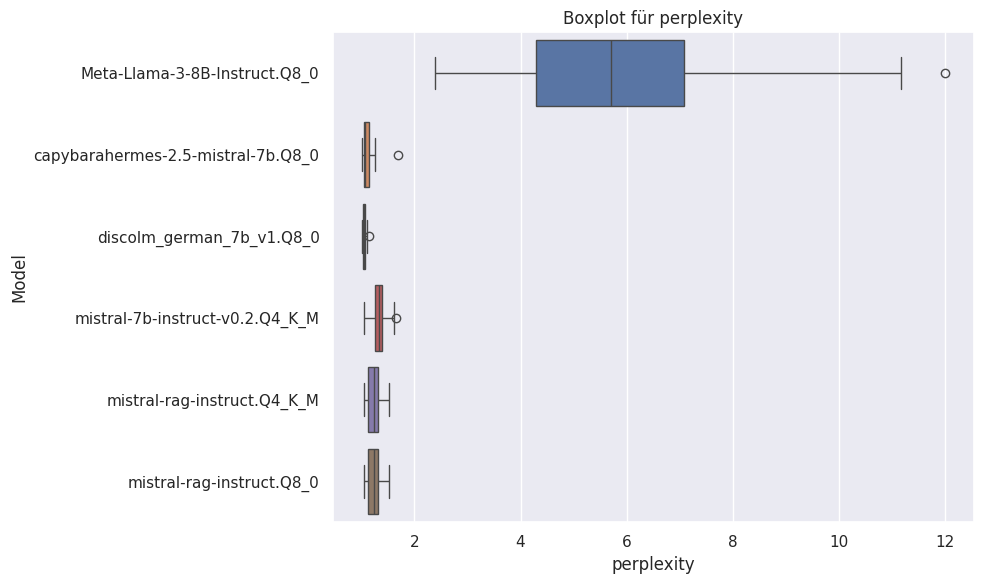

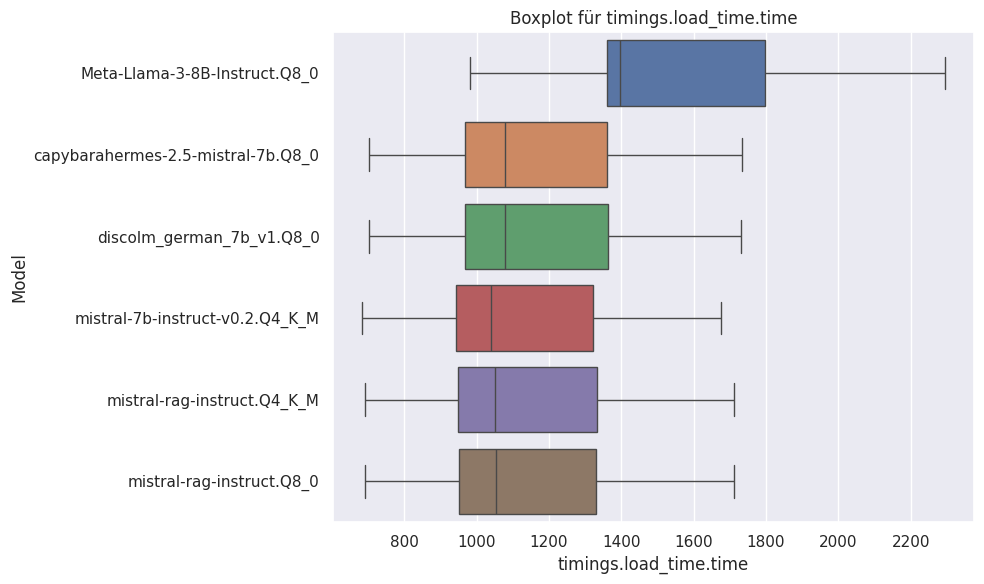

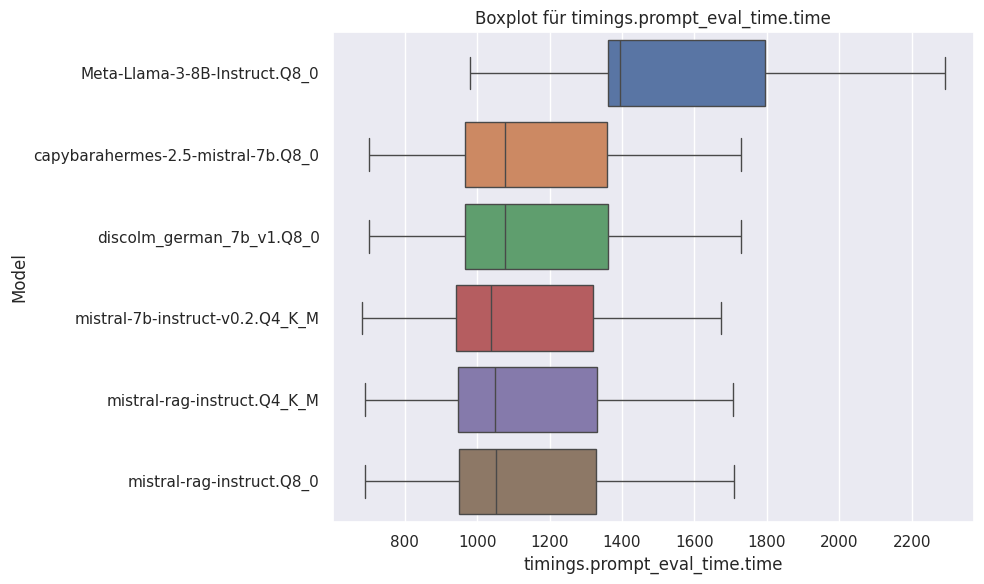

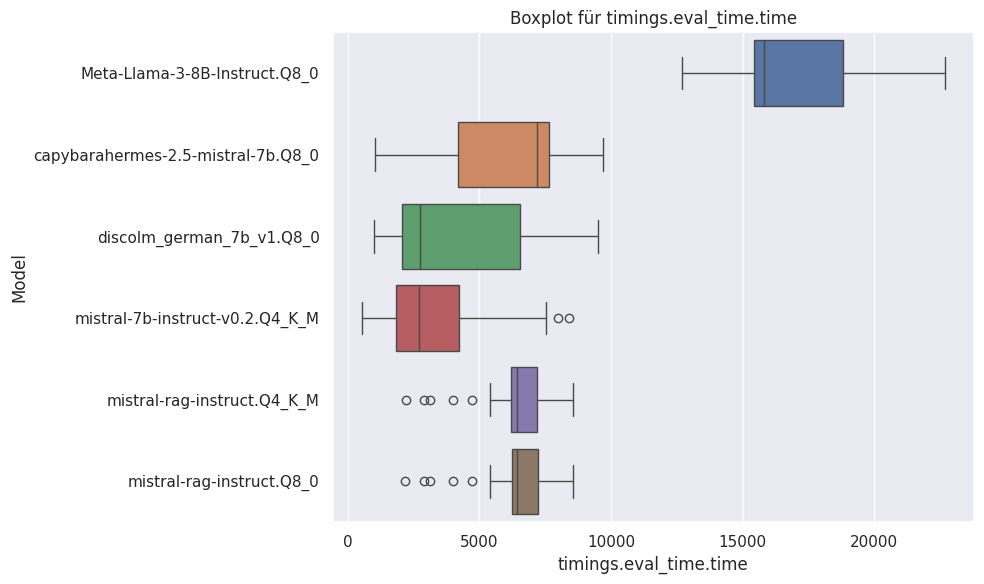

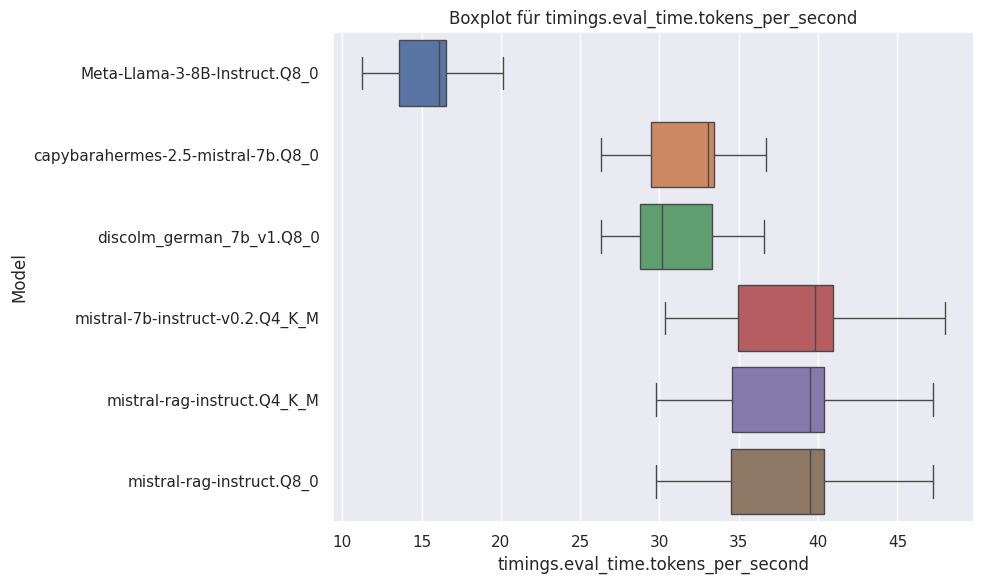

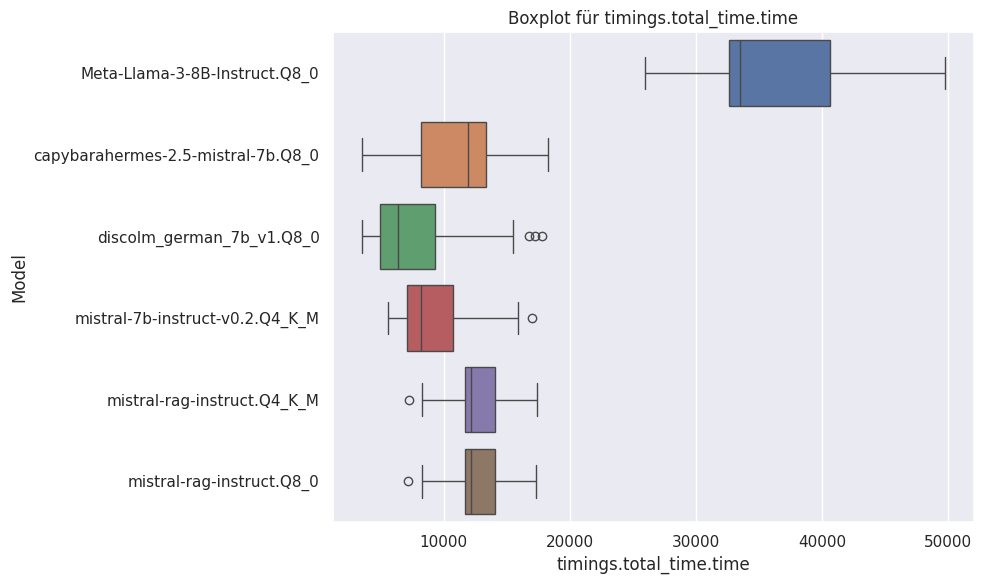

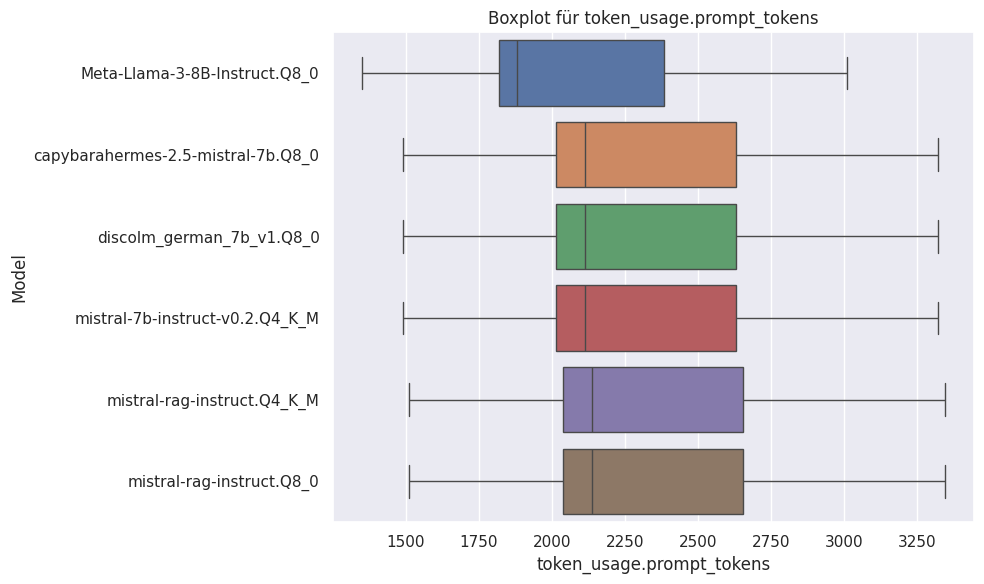

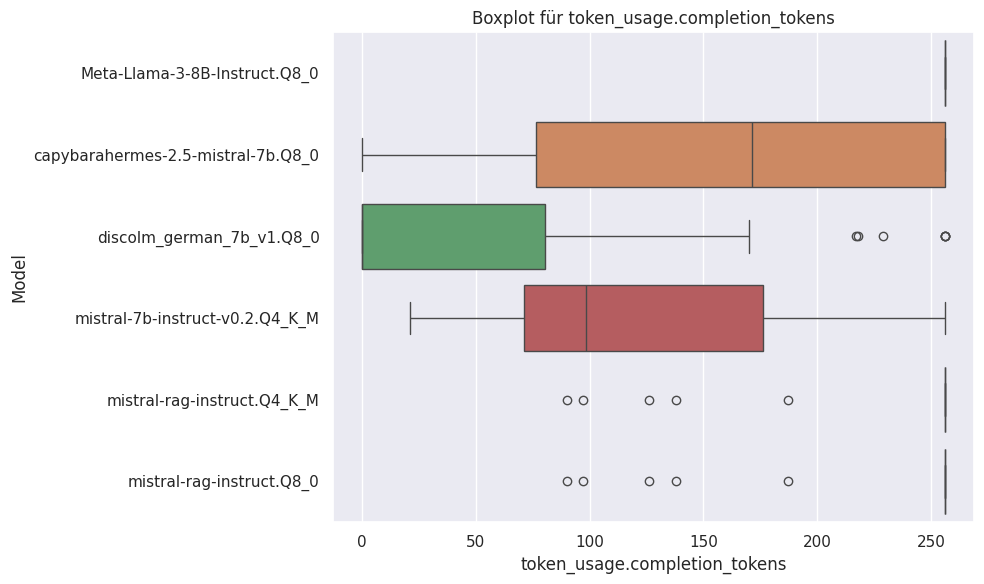

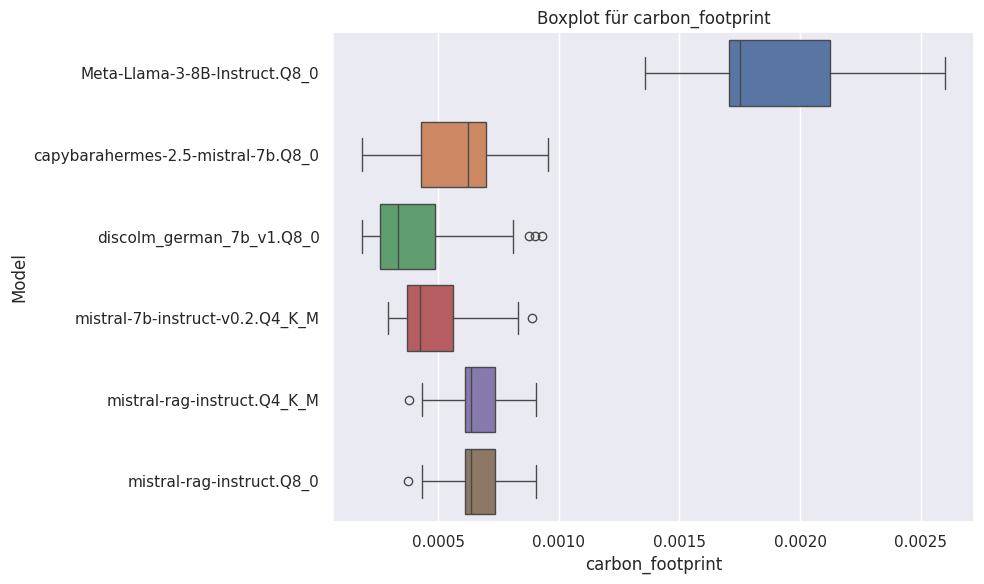

In [15]:



for metric in important_metric_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=metric, y=llm_column, data=df, hue=llm_column)
    plt.title(f'Boxplot of {metric} for each model')
    plt.title(f'Boxplot für {metric}')
    plt.xlabel(metric)
    plt.ylabel('Model')
    #plt.xticks(rotation=45)
    #plt.legend(title='LLMS')
    plt.tight_layout()
    plt.show()





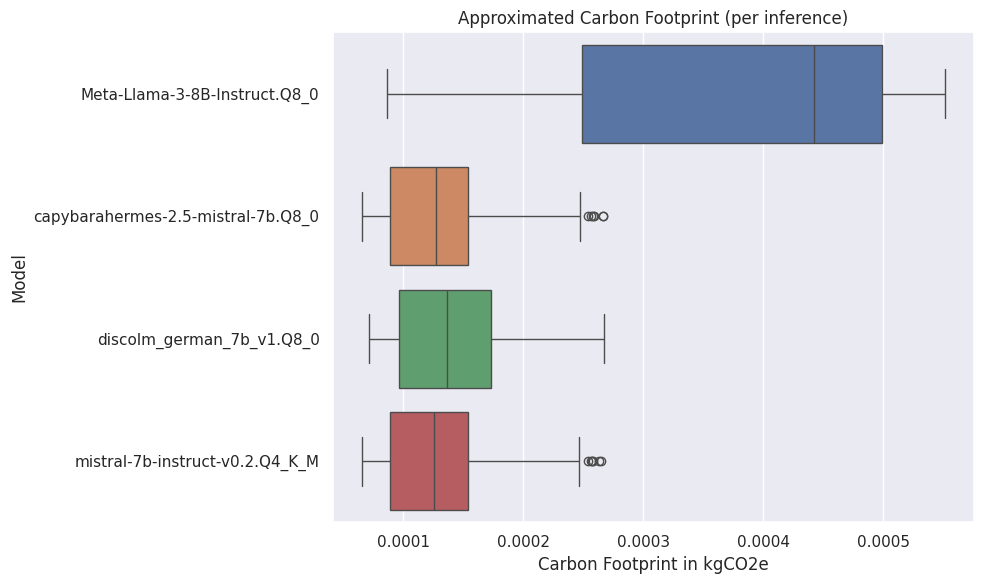

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='carbon_footprint', y=llm_column, data=df, hue=llm_column)
plt.title(f'Approximated Carbon Footprint (per inference)')

plt.xlabel('Carbon Footprint in kgCO2e')
plt.ylabel('Model')
#plt.xticks(rotation=45)
#plt.legend(title='LLMS')
plt.tight_layout()
plt.show()

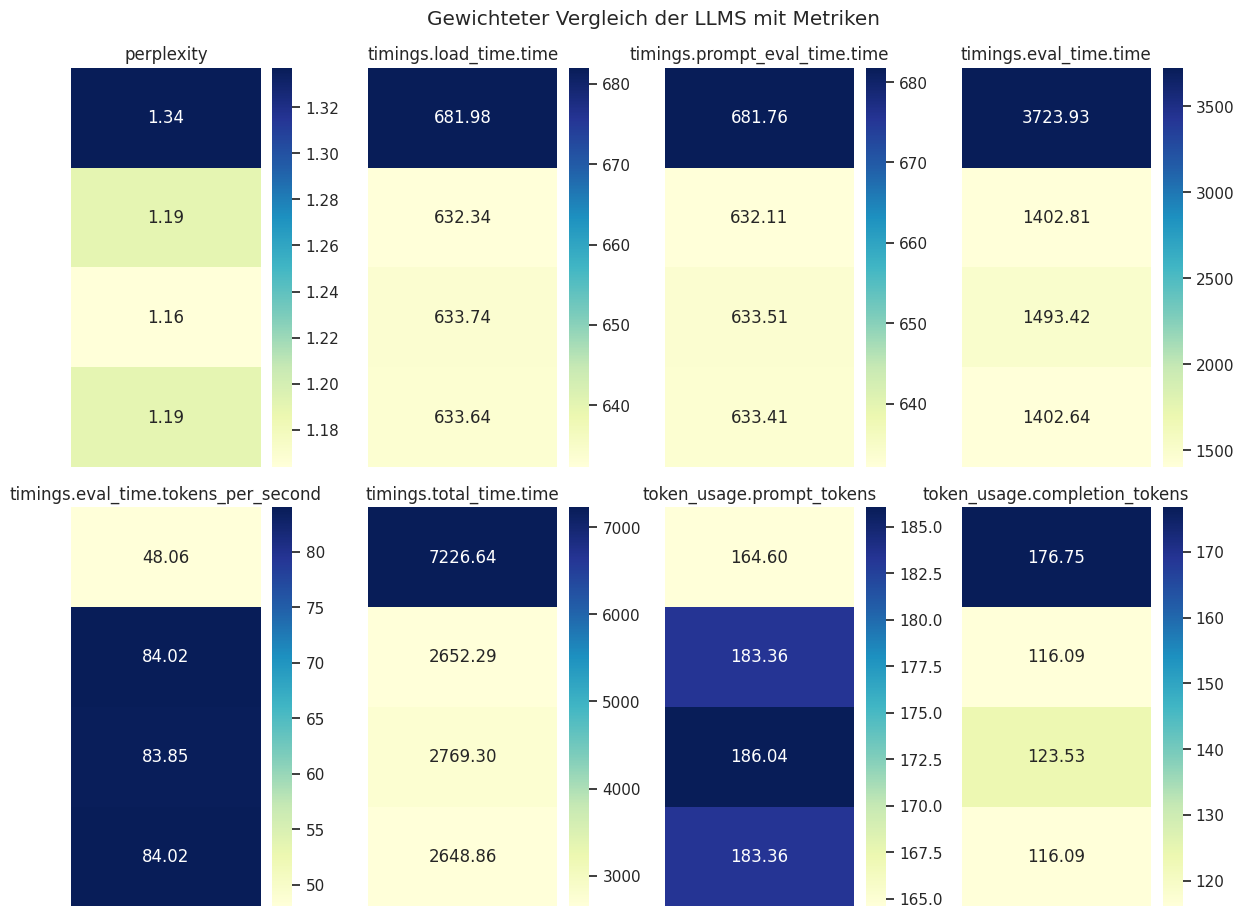

In [15]:
import numpy as np

important_metric_columns = ['perplexity', 'timings.load_time.time', 'timings.prompt_eval_time.time', 'timings.eval_time.time', 'timings.eval_time.tokens_per_second', 'timings.total_time.time', 'token_usage.prompt_tokens', 'token_usage.completion_tokens']

unique_models = df[llm_column].unique()
matrix = np.zeros((len(unique_models), len(important_metric_columns)))

for i, model in enumerate(unique_models):
    for j, metric in enumerate(important_metric_columns):
        mean_score = df[(df[llm_column] == model)][metric].mean()
        matrix[i, j] = mean_score

plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(matrix, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=important_metric_columns, yticklabels=unique_models)
plt.xlabel('Metriken')
plt.ylabel('LLMS')
plt.title('Gewichteter Vergleich der LLMS mit Metriken')
plt.show()


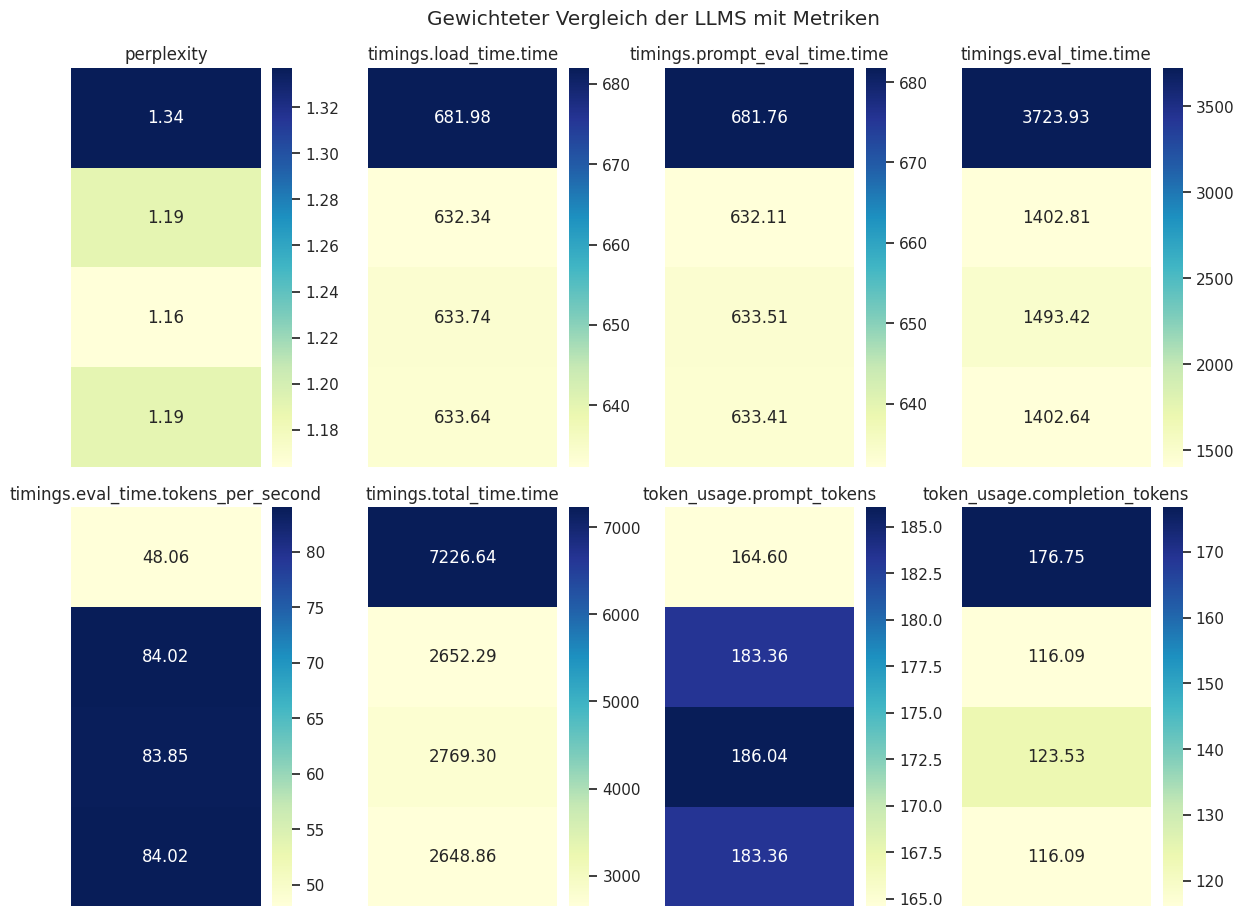

In [20]:


important_metric_columns = ['perplexity', 'timings.load_time.time', 'timings.prompt_eval_time.time', 'timings.eval_time.time', 'timings.eval_time.tokens_per_second', 'timings.total_time.time', 'token_usage.prompt_tokens', 'token_usage.completion_tokens']

unique_models = df[llm_column].unique()
matrix = np.zeros((len(unique_models), len(important_metric_columns)))

for i, model in enumerate(unique_models):
    for j, metric in enumerate(important_metric_columns):
        mean_score = df[df[llm_column] == model][metric].mean()
        matrix[i, j] = mean_score

plt.figure(figsize=(12, 9))

# Plotting each column separately to have different color bars
for j, metric in enumerate(important_metric_columns):
    ax = plt.subplot(2, 4, j+1)
    heatmap = sns.heatmap(matrix[:, j].reshape(-1, 1), annot=True, fmt=".2f", cmap="YlGnBu", cbar=True, ax=ax)
    heatmap.set_xticklabels([])
    heatmap.set_yticklabels([])
    plt.title(metric)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Gewichteter Vergleich der LLMS mit Metriken', y=1.02)
plt.show()

In [64]:
print(sns.color_palette())

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), (0.8666666666666667, 0.5176470588235295, 0.3215686274509804), (0.3333333333333333, 0.6588235294117647, 0.40784313725490196), (0.7686274509803922, 0.3058823529411765, 0.3215686274509804), (0.5058823529411764, 0.4470588235294118, 0.7019607843137254), (0.5764705882352941, 0.47058823529411764, 0.3764705882352941), (0.8549019607843137, 0.5450980392156862, 0.7647058823529411), (0.5490196078431373, 0.5490196078431373, 0.5490196078431373), (0.8, 0.7254901960784313, 0.4549019607843137), (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]


TypeError: unhashable type: 'list'

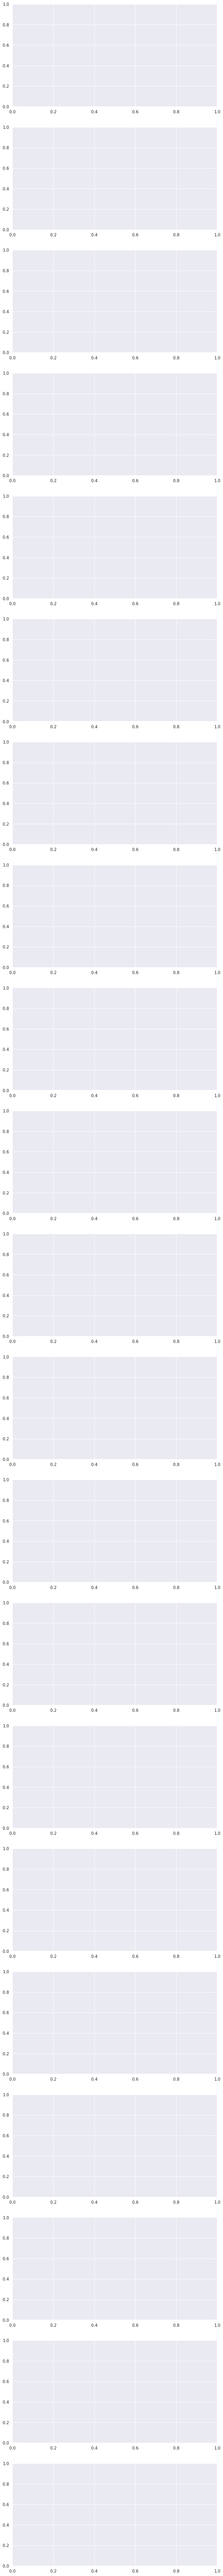

In [5]:
fig, axes = plt.subplots(nrows=len(numeric_metric_columns), figsize=(10, 6 * len(numeric_metric_columns)))  # Adjust size as necessary

# Create a boxplot for each metric
for ax, metric in zip(axes, numeric_metric_columns):
    sns.boxplot(x='model', y=metric, data=df, ax=ax)
    ax.set_title(f'Boxplot of {metric} for each model')
    ax.set_ylabel('Model')
    ax.set_xlabel(metric)
    ax.tick_params(axis='x', rotation=45)  # Rotate model names if necessary

plt.tight_layout()
plt.show()

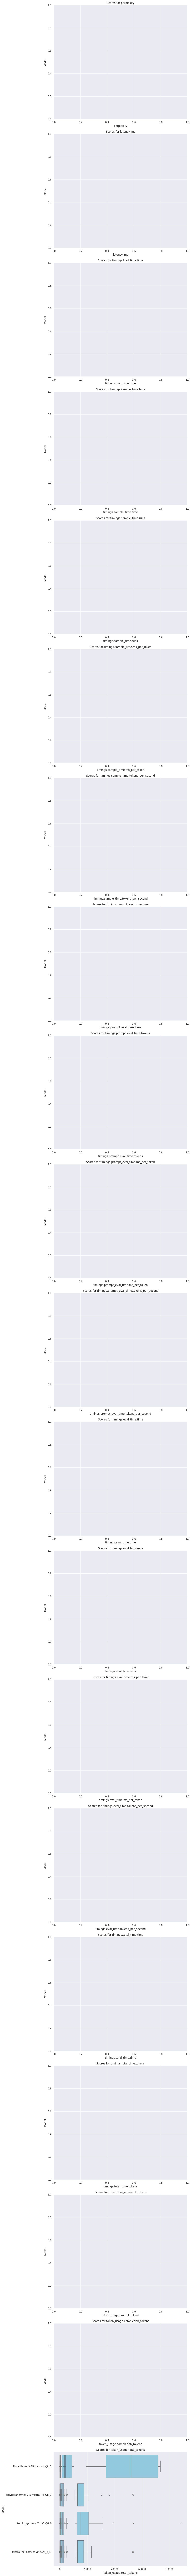

In [48]:
num_metrics = len(numeric_metric_columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 8*num_metrics))

# Plot histograms for each metric
for i, metric in enumerate(numeric_metric_columns):
    ax = axes[i]
    '''
    for llm in unique_models:
            metric_data = df[df[llm_column] == llm][metric]
            ax.hist(metric_data, alpha=0.5, label=llm)
    '''
    
    sns.boxplot(data=df, x=metric, y=llm_column, color='skyblue', order=unique_models)
    ax.set_title(f'Scores for {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Model')
    #ax.legend()
    #ax.xlim(-0.02, 1.02)

plt.tight_layout()
plt.show()

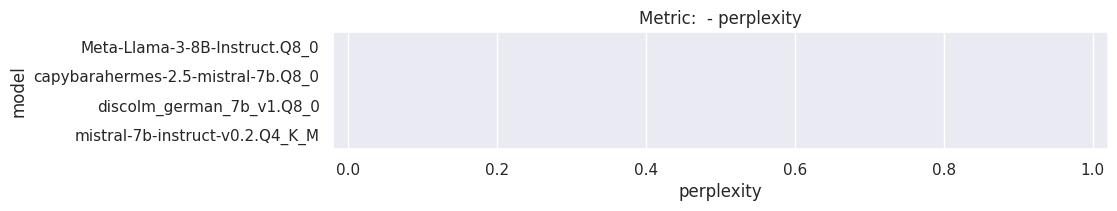

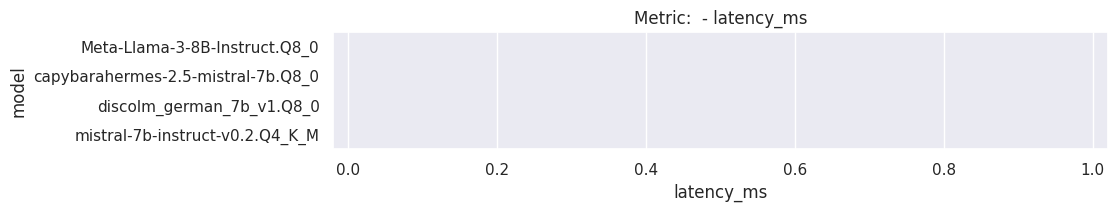

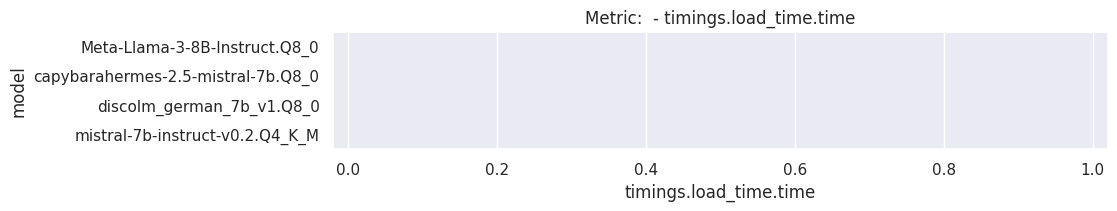

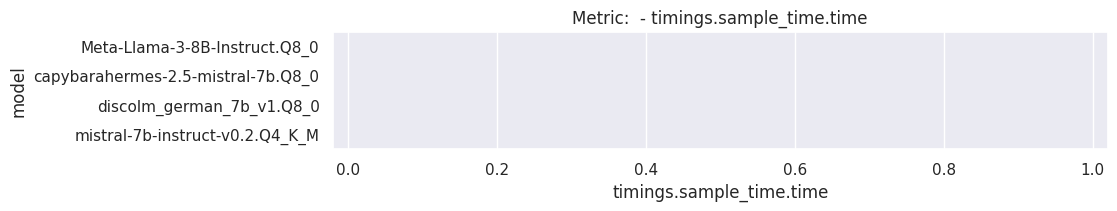

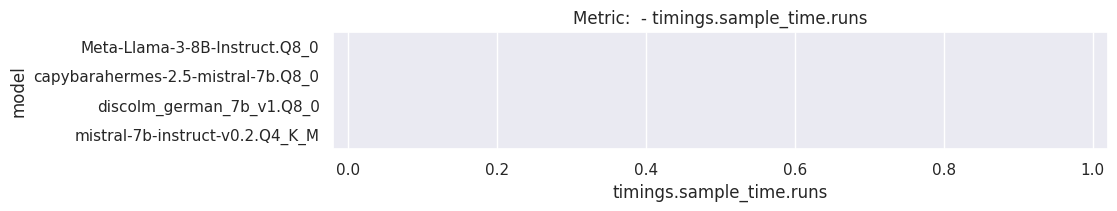

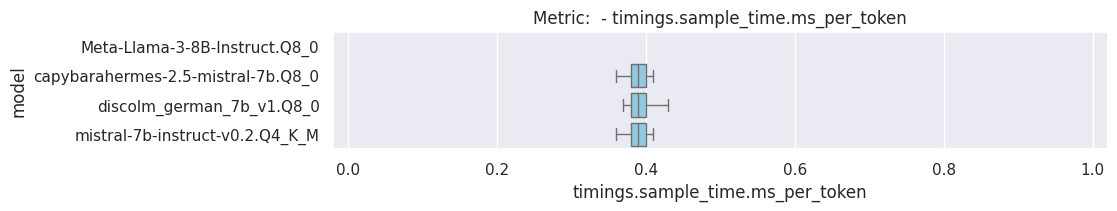

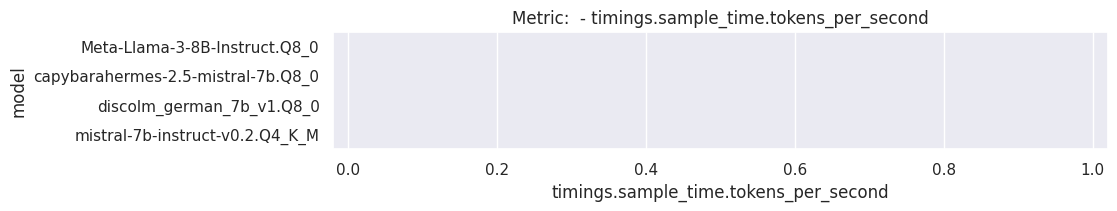

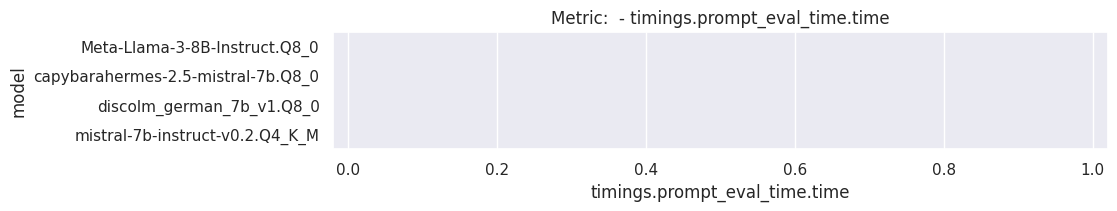

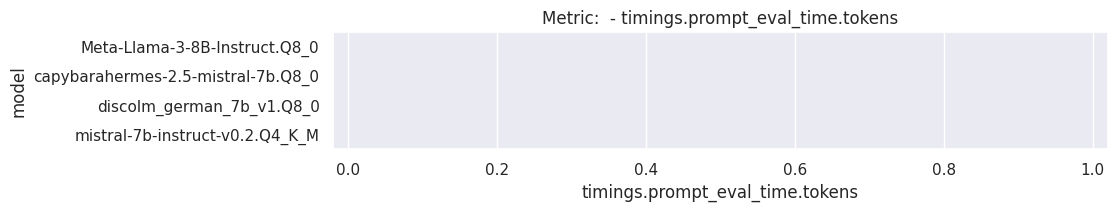

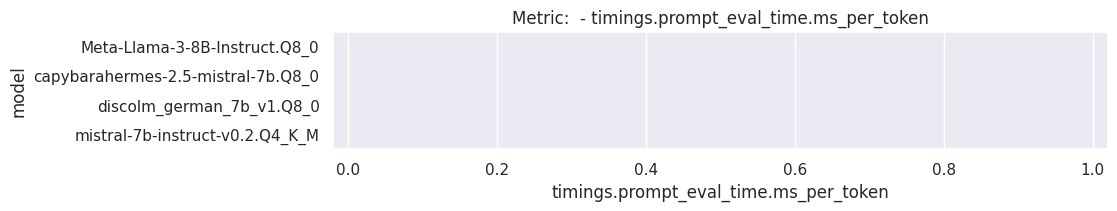

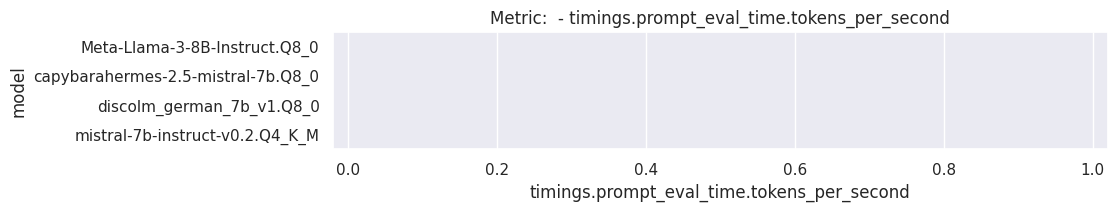

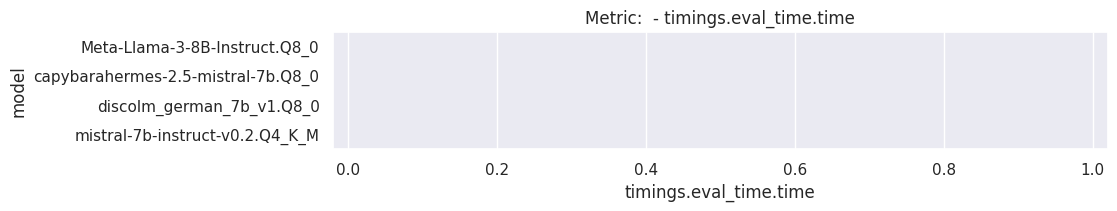

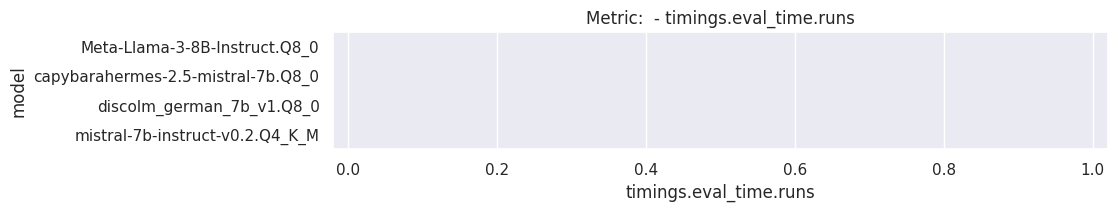

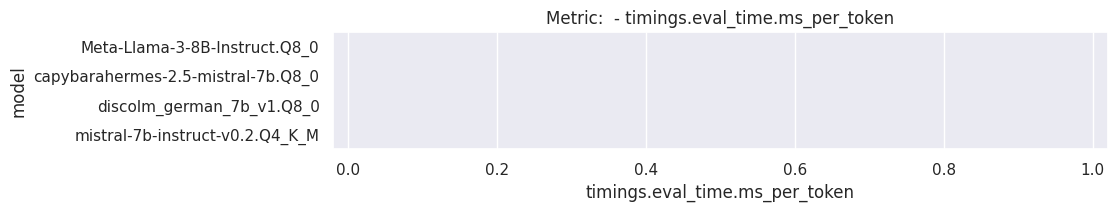

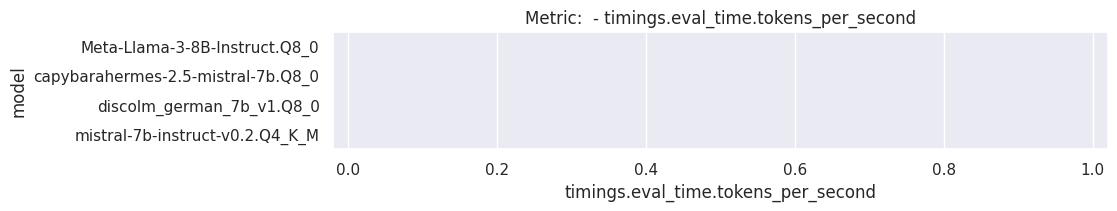

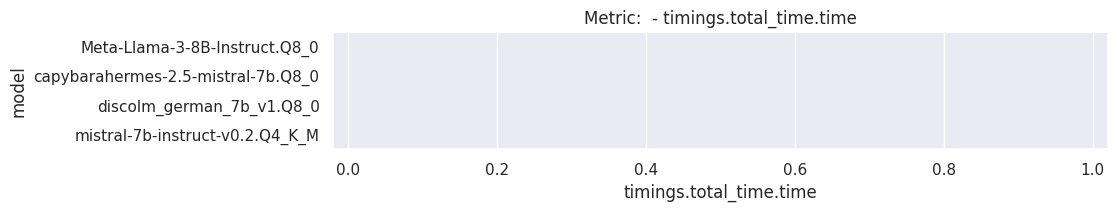

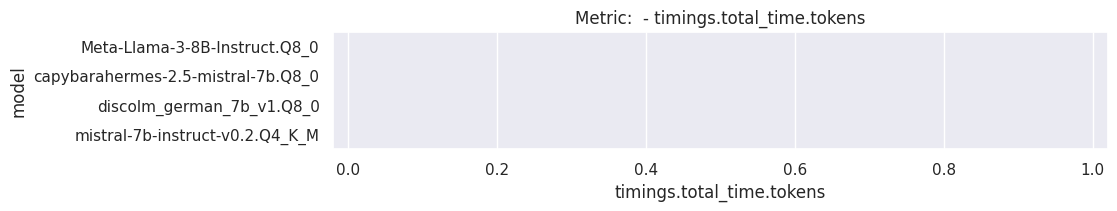

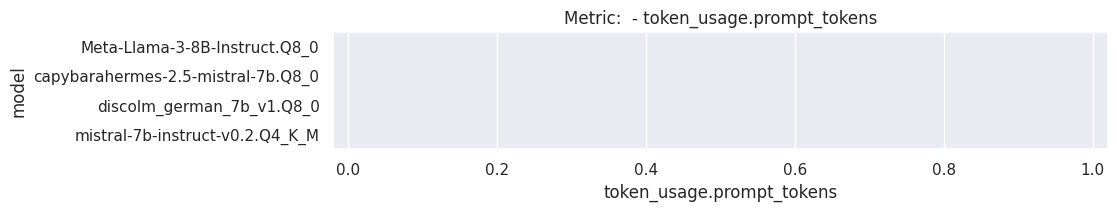

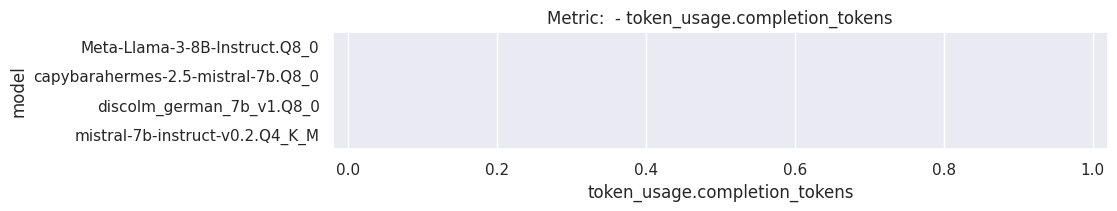

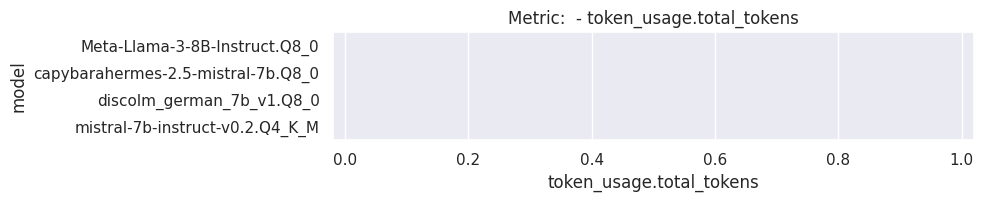

In [39]:
num_metrics = len(numeric_metric_columns)

# Plot histograms for each metric
for i, metric in enumerate(numeric_metric_columns):
    plt.figure(figsize=(10, 7))
    
    plt.subplot(4, 1, 1)
    sns.boxplot(data=df, x=metric, y=llm_column, color='skyblue') #, order=unique_models
    plt.xlabel(metric)
    plt.title(f'Metric - {metric}')
    plt.xlim(-0.02, 1.02) 


plt.subplots_adjust(hspace=100)
plt.xlim(-0.02, 1.02)
plt.tight_layout()
plt.show()

In [6]:
df[df['model']=='mistral-7b-instruct-v0.2.Q4_K_M']

model  \
24   mistral-7b-instruct-v0.2.Q4_K_M   
180  mistral-7b-instruct-v0.2.Q4_K_M   
200  mistral-7b-instruct-v0.2.Q4_K_M   
44   mistral-7b-instruct-v0.2.Q4_K_M   
20   mistral-7b-instruct-v0.2.Q4_K_M   
40   mistral-7b-instruct-v0.2.Q4_K_M   
184  mistral-7b-instruct-v0.2.Q4_K_M   
208  mistral-7b-instruct-v0.2.Q4_K_M   
4    mistral-7b-instruct-v0.2.Q4_K_M   
196  mistral-7b-instruct-v0.2.Q4_K_M   
188  mistral-7b-instruct-v0.2.Q4_K_M   
16   mistral-7b-instruct-v0.2.Q4_K_M   
8    mistral-7b-instruct-v0.2.Q4_K_M   
12   mistral-7b-instruct-v0.2.Q4_K_M   
28   mistral-7b-instruct-v0.2.Q4_K_M   
204  mistral-7b-instruct-v0.2.Q4_K_M   
192  mistral-7b-instruct-v0.2.Q4_K_M   
36   mistral-7b-instruct-v0.2.Q4_K_M   
32   mistral-7b-instruct-v0.2.Q4_K_M   
128  mistral-7b-instruct-v0.2.Q4_K_M   
176  mistral-7b-instruct-v0.2.Q4_K_M   
120  mistral-7b-instruct-v0.2.Q4_K_M   
132  mistral-7b-instruct-v0.2.Q4_K_M   
116  mistral-7b-instruct-v0.2.Q4_K_M   
112  mistral-7b-instruct-v0.2.Q4_K_M   
136  mistral-7b-instruct-v0.2.Q4_K_M   
108  mistral-7b-instruct-v0.2.Q4_K_M   
140  mistral-7b-instruct-v0.2.Q4_K_M   
104  mistral-7b-instruct-v0.2.Q4_K_M   
100  mistral-7b-instruct-v0.2.Q4_K_M   
144  mistral-7b-instruct-v0.2.Q4_K_M   
96   mistral-7b-instruct-v0.2.Q4_K_M   
148  mistral-7b-instruct-v0.2.Q4_K_M   
92   mistral-7b-instruct-v0.2.Q4_K_M   
88   mistral-7b-instruct-v0.2.Q4_K_M   
48   mistral-7b-instruct-v0.2.Q4_K_M   
152  mistral-7b-instruct-v0.2.Q4_K_M   
156  mistral-7b-instruct-v0.2.Q4_K_M   
80   mistral-7b-instruct-v0.2.Q4_K_M   
76   mistral-7b-instruct-v0.2.Q4_K_M   
160  mistral-7b-instruct-v0.2.Q4_K_M   
72   mistral-7b-instruct-v0.2.Q4_K_M   
164  mistral-7b-instruct-v0.2.Q4_K_M   
68   mistral-7b-instruct-v0.2.Q4_K_M   
64   mistral-7b-instruct-v0.2.Q4_K_M   
168  mistral-7b-instruct-v0.2.Q4_K_M   
124  mistral-7b-instruct-v0.2.Q4_K_M   
60   mistral-7b-instruct-v0.2.Q4_K_M   
172  mistral-7b-instruct-v0.2.Q4_K_M   
56   mistral-7b-instruct-v0.2.Q4_K_M   
52   mistral-7b-instruct-v0.2.Q4_K_M   
84   mistral-7b-instruct-v0.2.Q4_K_M   
0    mistral-7b-instruct-v0.2.Q4_K_M   

                                                output  \
24   \n\nAnswer: Die Sprachnachweise können bis zum...   
180  \n\nAnswer (German): Ein Auswahlgespräch ist e...   
200  \n\nAnswer: Das Auswahlgespräch wird mindesten...   
44   \n\nAnswer: Für das Sommersemester muss der An...   
20   \n\nAnswer: Nein, in der Regel muss man eine d...   
40   \n\nAnswer: Für das Sommersemester müssen die ...   
184   (Why are selection interviews important for t...   
208   (Why are selection interviews important for t...   
4    \n\nAnswer: Um festzustellen, ob jemand Deutsc...   
196  \n\nAnswer: The Auswahlgespräch is organized i...   
188  \n\nAnswer: Im Auswahlgespräch handelt es sich...   
16   \n\nAnswer: Ja, es gibt Ausnahmen für Deutschp...   
8    \n\nAnswer: Um zu zeigen, dass man Deutsch kan...   
12   \n\nAnswer: Ja, in besonders begründeten Einze...   
28   \n\nTranslation: When can one submit their Ger...   
204  \n\nAnswer: Der Zweck eines Auswahlgesprächs i...   
192  \n\nAnswer: Die Bewerberinnen und Bewerber wer...   
36   \n\nAnswer: Die Anträge auf Zulassung für das ...   
32   \n\nAnswer: Ihre Nachreichung des Deutschtests...   
128  \n\nAnswer: Wenn es mehr geeignete Bewerbungen...   
176   (What does an interview for selection look li...   
120   (What happens when the number of suitable app...   
132  \n\nAnswer: Die Auswahlkommission besteht aus ...   
116  \n\nAnswer: Nach dem gegebenen Kontext kann nu...   
112  \n\nAnswer: Nach dem gegebenen Kontext kann je...   
136  \n\nAnswer: Der Fakultätsrat entscheidet darüb...   
108  \n\nAnswer: Derjenige nimmt am Auswahlverfahre...   
140  \n\nAnswer: Der Fakultätsrat trifft die Auswah...   
104  \n\nAnswer: Wenn Sie den Studienplatz nicht re...   
100  \n\nAnswer: Wenn die Frist zur Annahme des Stu...   
144  \n\nAnswer: Die Auswahl von Mitgliedern für di...   
96   \n\nAnswe

In [ ]:
num_metrics = len(numeric_metric_columns)
fig, axes = plt.subplots(num_metrics, 1, figsize=(12, 8*num_metrics))

# Plot histograms for each metric
for i, metric in enumerate(numeric_metric_columns):
    ax = axes[i]
    for llm in unique_models:
        data = df[df[llm_column] == llm][metric]
        ax.hist(data, alpha=0.5, label=llm)
    ax.set_title(f'Histogram of {metric}')
    ax.set_xlabel(metric)
    ax.set_ylabel('Frequency')
    ax.legend()

plt.tight_layout()
plt.show()

In [8]:
data = [
    {
        "model": "mistral-7b-instruct-v0.2.Q4_K_M",
        "output": 'test',      
        "answer": 'test',
        "perplexity": 1.0653073614871005,
        "timings": {
            "load_time": {"time": 1381.2},
            "sample_time": {"time": 81.14, "runs": 81, "ms_per_token": 0.32, "tokens_per_second": 3155.2},
            "prompt_eval_time": {"time": 1380.92, "tokens": 1380, "ms_per_token": 5.46, "tokens_per_second": 183.21},
            "eval_time": {"time": 14015.64, "runs": 14015, "ms_per_token": 54.96, "tokens_per_second": 18.19},
            "total_time": {"time": 16716.99, "tokens": 16716}
        },
        "token_usage": {"prompt_tokens": 253, "completion_tokens": 256, "total_tokens": 509},
        "finish_reason": "length",
        "question": "Welche Dokumente können als Nachweis für deutsche Sprachkenntnisse akzeptiert werden?",
        "latency_ms": 32778
    }
]

# Flatten JSON data into a pandas DataFrame
df = pd.json_normalize(data)
df

model output answer  perplexity finish_reason  \
0  mistral-7b-instruct-v0.2.Q4_K_M   test   test    1.065307        length   

                                            question  latency_ms  \
0  Welche Dokumente können als Nachweis für deuts...       32778   

   timings.load_time.time  timings.sample_time.time  timings.sample_time.runs  \
0                  1381.2                     81.14                        81   

   ...  timings.prompt_eval_time.tokens_per_second  timings.eval_time.time  \
0  ...                                      183.21                14015.64   

   timings.eval_time.runs  timings.eval_time.ms_per_token  \
0                   14015                           54.96   

   timings.eval_time.tokens_per_second  timings.total_time.time  \
0                                18.19                 16716.99   

   timings.total_time.tokens  token_usage.prompt_tokens  \
0                      16716                        253   

   token_usage.completion_tokens  token_usage.total_tokens  
0                            256                       509  

[1 rows x 25 columns]